<a href="https://colab.research.google.com/github/Adukemi/MyProjects/blob/main/DACertification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analyst Professional Practical Exam

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Validation: Data Cleaning
df = pd.read_csv('/content/product_sales.csv')

df['sales_method'] = df['sales_method'].astype(str).str.replace('em + call', 'Email + Call')
df['sales_method'] = df['sales_method'].replace('email', 'Email')

# check the customer_id is unique
#print(df[df.duplicated(subset='customer_id', keep=False)])

df.head(100)
#df.info()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
95,1,Email,172fcd47-62ac-4976-bac7-6934464a8c5c,8,81.98,0,23,Arizona
96,4,Call,750b0907-f87d-4c4e-95bf-de9952fb22c1,11,53.08,5,27,Kentucky
97,4,Call,8185cdfd-0b66-4ea3-aa77-c9e4d64f2b52,10,51.82,0,27,Ohio
98,5,Email + Call,b70489e0-d3d4-494d-b4c9-fa7f71ba4b21,12,185.65,1,27,Michigan


          revenue   nb_sold
revenue  1.000000  0.967843
nb_sold  0.967843  1.000000
          revenue   nb_sold
revenue  1.000000  0.989591
nb_sold  0.989591  1.000000
          revenue   nb_sold
revenue  1.000000  0.989591
nb_sold  0.989591  1.000000



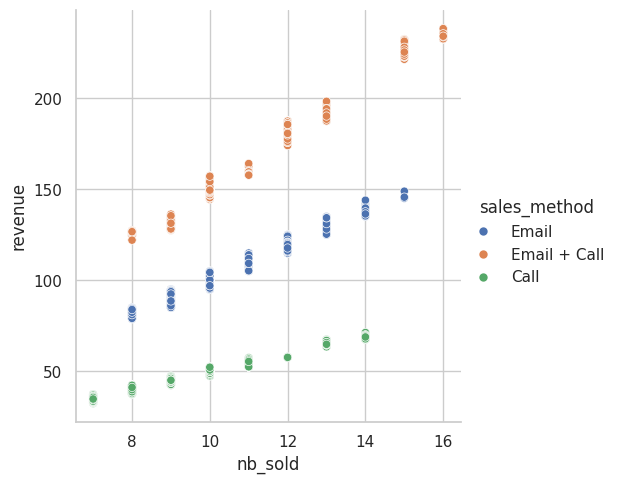

In [ ]:
# Check the relationship between revenue column and nb_sold column by sales_method Email
df_Email = df[df['sales_method'] == 'Email']
print(df_Email[['revenue','nb_sold']].corr())

# Check the relationship between revenue column and nb_sold column by sales_method Email + Call
df_Email_Call = df[df['sales_method'] == 'Email + Call']
print(df_Email_Call[['revenue','nb_sold']].corr())

# Check the relationship between revenue column and nb_sold column by sales_method Call
df_Call = df[df['sales_method'] == 'Call']
print(df_Email_Call[['revenue','nb_sold']].corr())

print("")
# Visualize the relationship between revenue column and nb_sold column classified by sales_method.
sns.relplot(x='nb_sold', y='revenue', data=df,hue='sales_method')

In [ ]:
import statsmodels.formula.api as smf

# Create df_trainmodels
df_trainmodel = df[~df['revenue'].isna()]

# Create df_results
df_result = df[df['revenue'].isna()]

# Create the model then predict the missing values
x = smf.ols('revenue ~ nb_sold + C(sales_method)', data = df_trainmodel).fit()
result = x.predict(df_result)
print(result)


0         99.551250
3        108.302383
16        99.551250
17       208.270929
28       117.053516
            ...    
14951     51.964797
14957     25.711398
14970    182.017530
14992    182.017530
14999    190.768663
Length: 1074, dtype: float64


In [ ]:
# Fill missing values with results
df['revenue'] = df['revenue'].fillna(result).round(2)
print(df.head())

   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10    99.55   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11   108.30   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                  0              24    Arizona  
1                  1              28     Kansas  
2                  6              26  Wisconsin  
3                  3              25    Indiana  
4                  0              28   Illinois  


In [ ]:
df.head(100)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,99.55,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,108.30,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
95,1,Email,172fcd47-62ac-4976-bac7-6934464a8c5c,8,81.98,0,23,Arizona
96,4,Call,750b0907-f87d-4c4e-95bf-de9952fb22c1,11,53.08,5,27,Kentucky
97,4,Call,8185cdfd-0b66-4ea3-aa77-c9e4d64f2b52,10,51.82,0,27,Ohio
98,5,Email + Call,b70489e0-d3d4-494d-b4c9-fa7f71ba4b21,12,185.65,1,27,Michigan


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


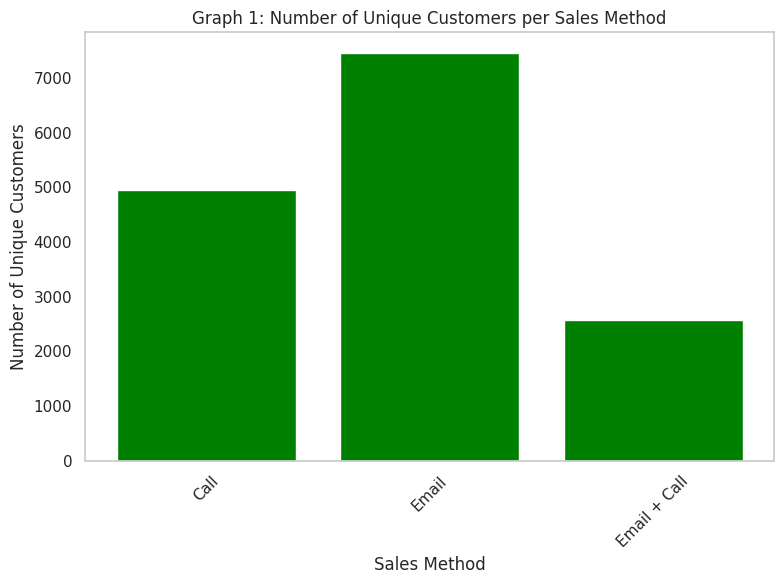

,sales_method,unique_customers
0,Call,4962
1,Email,7466
2,Email + Call,2572


In [ ]:
# 1. How many customers were there for each approach?

customer_count = df.groupby('sales_method')['customer_id'].nunique().reset_index()
customer_count.columns = ['sales_method', 'unique_customers']

#There were more sales via email 6,922 (7,466) more than the other methods since it's inexpensive to use.


# Plotting
plt.figure(figsize=(8, 6))
plt.bar(customer_count['sales_method'], customer_count['unique_customers'], color='green')
plt.title('Graph 1: Number of Unique Customers per Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Unique Customers')
#plt.gca().spines['left'].set_visible(False)  # Corrected this line
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()

plt.show()

print("")
customer_count

Overall Revenue Statistics:
 count    15000.000000
mean        95.689723
std         48.178200
min         25.710000
25%         52.760000
50%         90.700000
75%        108.300000
max        238.320000
Name: revenue, dtype: float64



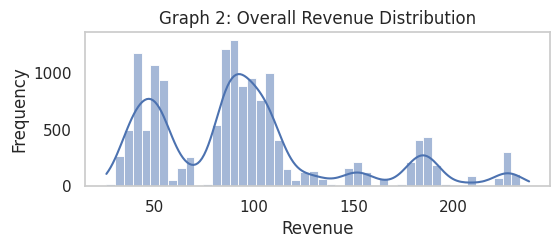



Revenue Statistics by Sales Method:
                count        mean        std     min       25%      50%  \
sales_method                                                             
Call          4962.0   47.673833   8.952431   25.71   41.4600   49.265   
Email         7466.0   97.182298  11.144804   78.83   88.1525   95.790   
Email + Call  2572.0  183.991155  27.744558  122.11  164.4250  184.500   

                   75%     max  
sales_method                    
Call           52.7000   86.97  
Email         105.2975  148.97  
Email + Call  191.2750  238.32  



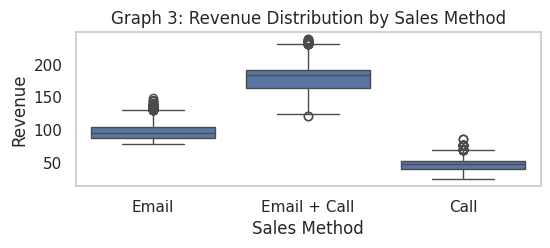

In [ ]:
# 2. - What does the spread of the revenue look like overall? And for each method?

# Spread of the revenue
overall_stats = df['revenue'].describe()
print("Overall Revenue Statistics:\n", overall_stats)
print("")

plt.figure(figsize=(6, 2))
sns.histplot(df['revenue'], kde=True)
plt.title('Graph 2: Overall Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()
print("")

# Revenue Spread by Method
method_stats = df.groupby('sales_method')['revenue'].describe()
print("\nRevenue Statistics by Sales Method:\n", method_stats)
print("")

plt.figure(figsize=(6, 2))
sns.boxplot(x='sales_method', y='revenue', data=df)
plt.title('Graph 3: Revenue Distribution by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.grid(False)
plt.show()


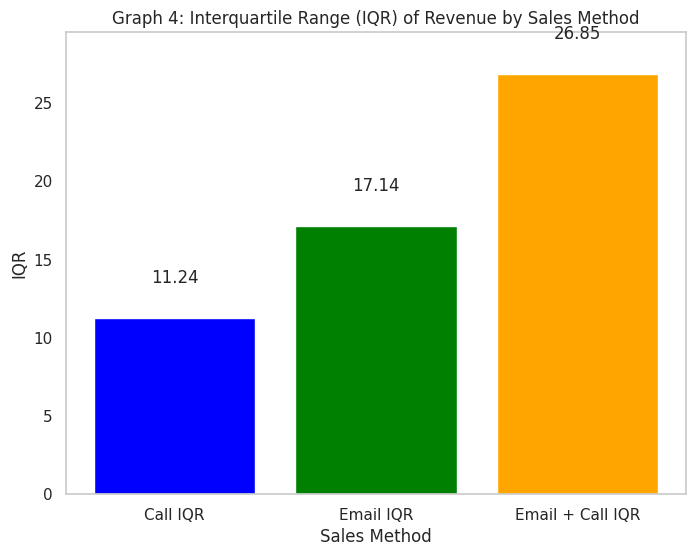

In [ ]:
# the IQR of each method's revenue
from scipy.stats import iqr
import pandas as pd

call = df.loc[df.sales_method=='Call', 'revenue'].round(2)
email = df.loc[df.sales_method=='Email', 'revenue'].round(2)
email_call = df.loc[df.sales_method=='Email + Call', 'revenue'].round(2)

iqr_values = {
    'Call IQR': iqr(call),
    'Email IQR': iqr(email),
    'Email + Call IQR': iqr(email_call)
}

iqr_value = pd.DataFrame([iqr_values])
iqr_value.head()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(iqr_value.columns, iqr_value.values.flatten(), color=['blue', 'green', 'orange'])
plt.title('Graph 4: Interquartile Range (IQR) of Revenue by Sales Method')
plt.ylabel('IQR')
plt.xlabel('Sales Method')
plt.ylim(0, max(iqr_value.values.flatten()) * 1.1)
plt.grid(False)

# Display values on top of bars
for i, v in enumerate(iqr_value.values.flatten()):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', va='bottom')

plt.show()


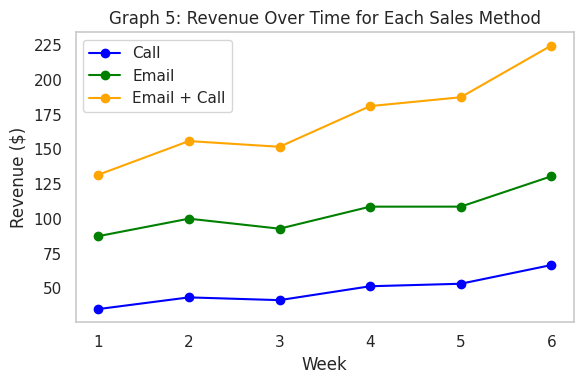

In [ ]:
# 3. Was there any difference in revenue over time for each of the methods?

# Grouping by week and sales method to get the sum of revenue for each combination
revenue_over_time = df.groupby(['week', 'sales_method'])['revenue'].agg(['mean','median']).unstack()

# Plotting
plt.figure(figsize=(6, 4))

# Plot mean revenue
if ('mean', 'Call') in revenue_over_time.columns:
    plt.plot(revenue_over_time.index, revenue_over_time[('mean', 'Call')], marker='o', linestyle='-', label='Call', color='blue')
if ('mean', 'Email') in revenue_over_time.columns:
    plt.plot(revenue_over_time.index, revenue_over_time[('mean', 'Email')], marker='o', linestyle='-', label='Email', color='green')
if ('mean', 'Email + Call') in revenue_over_time.columns:
    plt.plot(revenue_over_time.index, revenue_over_time[('mean', 'Email + Call')], marker='o', linestyle='-', label='Email + Call', color='orange')


plt.title('Graph 5: Revenue Over Time for Each Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue ($)')
plt.xticks(revenue_over_time.index)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()
print("")

revenue_over_time.head(7).style.background_gradient()

              Total Revenue  Average Revenue per Customer  Customer Count
sales_method                                                             
Call              236557.56                         47.67            4962
Email             725563.04                         97.18            7466
Email + Call      473225.25                        183.99            2572


Recommended Method: Email + Call



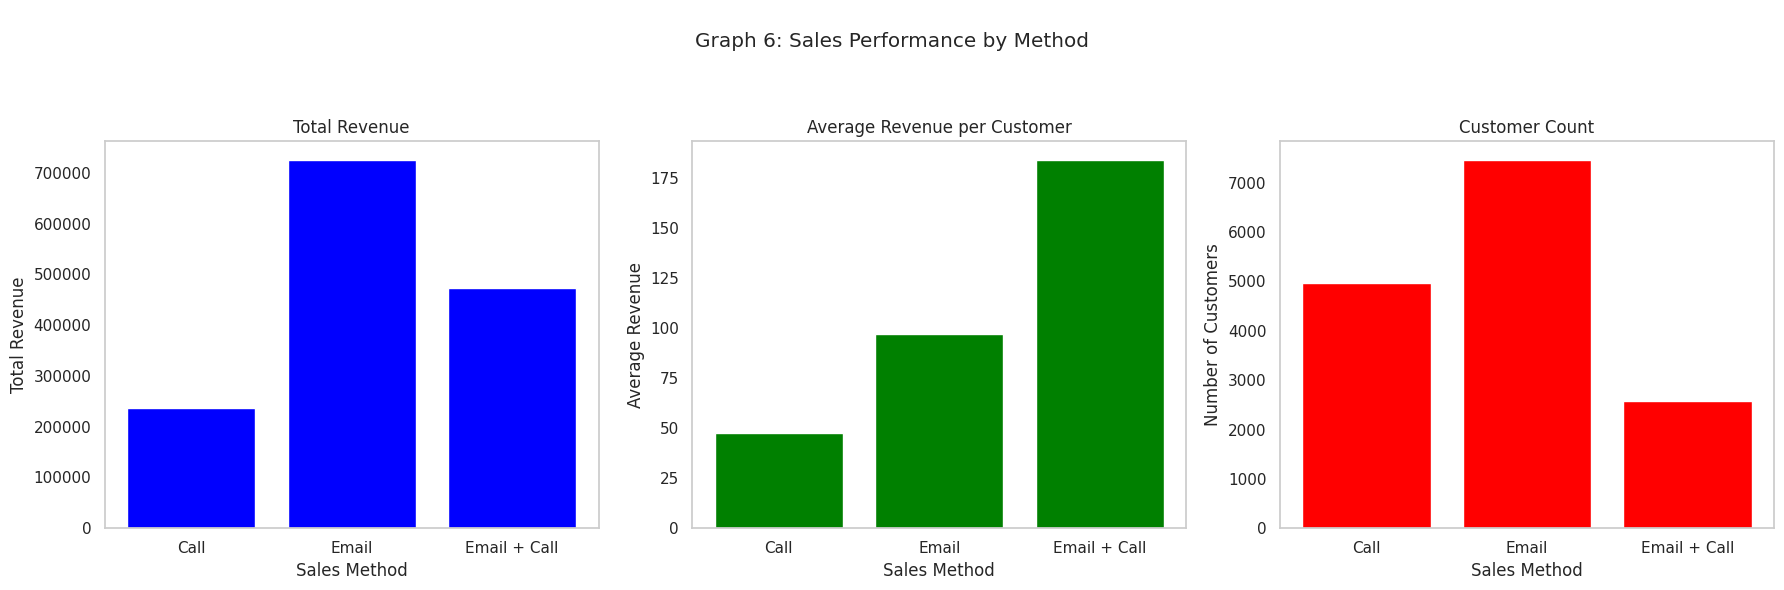

In [ ]:
# 4. Based on the data, which method would you recommend we continue to use?
# Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

# Calculate the average revenue per customer for each sales method
avg_revenue_per_customer = df.groupby('sales_method')['revenue'].mean().round(2)

# Calculate the total revenue for each sales method
total_revenue = df.groupby('sales_method')['revenue'].sum()

# Calculate the number of customers for each sales method
customer_count = df.groupby('sales_method')['customer_id'].nunique()

# Combine the results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Total Revenue': total_revenue,
    'Average Revenue per Customer': avg_revenue_per_customer,
    'Customer Count': customer_count
})

# Based on the comparison, we can recommend the method with the highest average revenue per customer
recommended_method = comparison_df['Average Revenue per Customer'].idxmax()

# Display the comparison DataFrame
print(comparison_df.head())
print('\n\nRecommended Method:',recommended_method)
print("")

# Plotting
plt.figure(figsize=(18, 6))

# Plot Total Revenue
plt.subplot(1, 3, 1)
plt.bar(comparison_df.index, comparison_df['Total Revenue'], color='blue')
plt.title('Total Revenue')
plt.xlabel('Sales Method')
plt.ylabel('Total Revenue')
plt.grid(False)

# Plot Average Revenue per Customer
plt.subplot(1, 3, 2)
plt.bar(comparison_df.index, comparison_df['Average Revenue per Customer'], color='green')
plt.title('Average Revenue per Customer')
plt.xlabel('Sales Method')
plt.ylabel('Average Revenue')
plt.grid(False)

# Plot Customer Count
plt.subplot(1, 3, 3)
plt.bar(comparison_df.index, comparison_df['Customer Count'], color='red')
plt.title('Customer Count')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.grid(False)

# Add a general title for the entire figure
plt.suptitle('\nGraph 6: Sales Performance by Method\n\n')

plt.tight_layout()
plt.show()

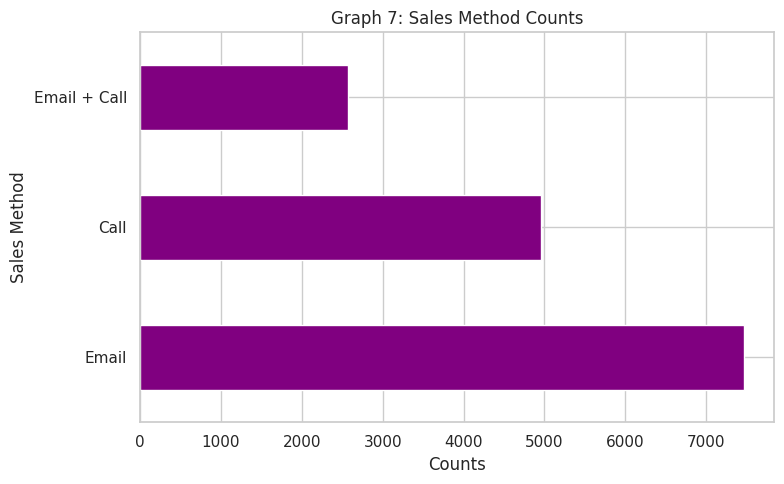

,count
sales_method,
Email,7466
Call,4962
Email + Call,2572


In [ ]:
# the total observations of each sales method
observation = df.sales_method.value_counts()

# Plotting as a horizontal bar chart with custom color
plt.figure(figsize=(8, 5))
observation.plot.barh(color='purple')
plt.title('Graph 7: Sales Method Counts')
plt.xlabel('Counts')
plt.ylabel('Sales Method')
#plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('Graph_7.png', bbox_inches='tight')

# Show the plot
plt.show()

# Display the total observations
observation

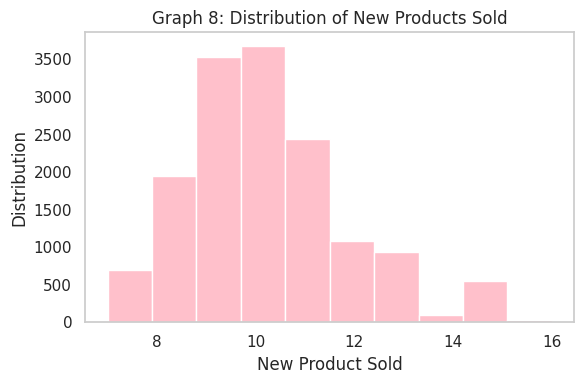

In [ ]:
#plot distribution of number products sold

plt.figure(figsize=(6, 4))
ax = df.nb_sold.plot.hist(color='pink')
ax.set_title('Graph 8: Distribution of New Products Sold')
ax.set_xlabel('New Product Sold')
ax.set_ylabel('Distribution')
plt.grid(False)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('Graph 8 Distribution of New Products Sold.png')

# Show the plot
plt.show()

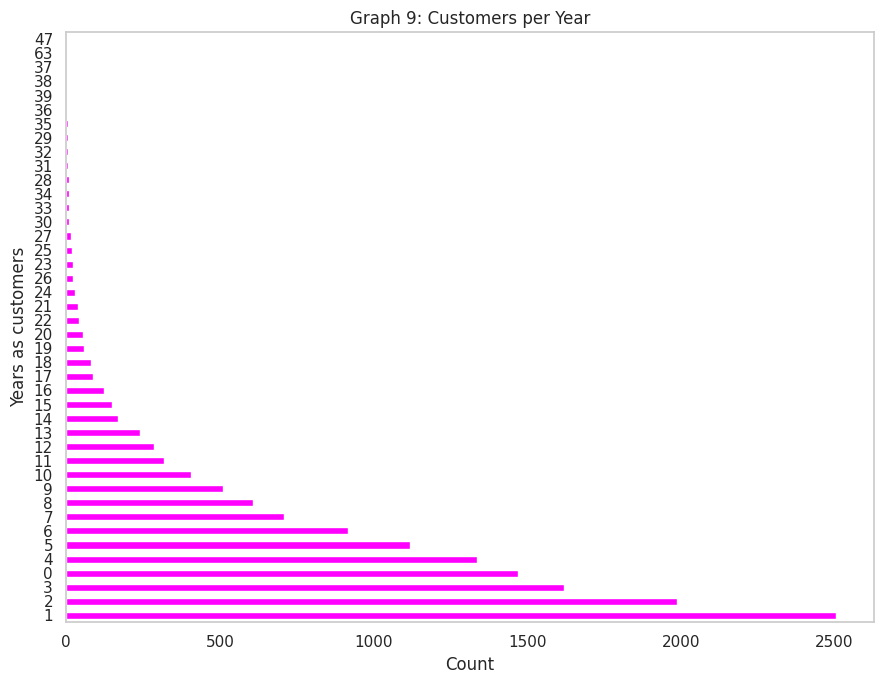

In [ ]:
# plot count of years_as_customer
plt.figure(figsize=(9, 7))
ax = df.years_as_customer.value_counts().plot(kind='barh', color='magenta')
ax.set_title('Graph 9: Customers per Year')
ax.set_ylabel('Years as customers')
ax.set_xlabel('Count')
plt.grid(False)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('Graph 9 Customers per Year.png')

# Show the plot
plt.show()

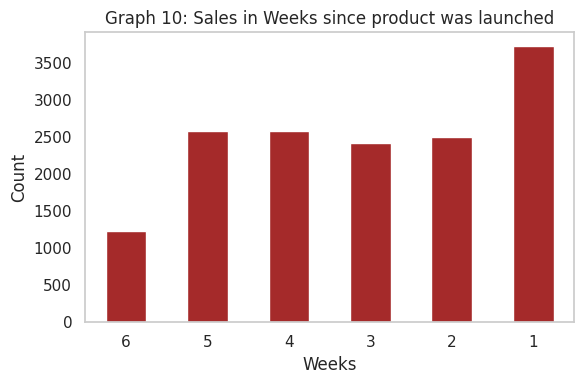

In [ ]:
# plot count of weeks since product was launched
plt.figure(figsize=(6, 4))
Week = [1, 2, 3, 4, 5, 6]
ax = df.week.value_counts().reindex(Week)[::-1].plot(kind='bar', color='brown')
ax.set_title('Graph 10: Sales in Weeks since product was launched')
ax.set_xlabel('Weeks')
ax.set_ylabel('Count')
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('Graph 10 Sales in Weeks since product was launched.png')

# Show the plot
plt.show()

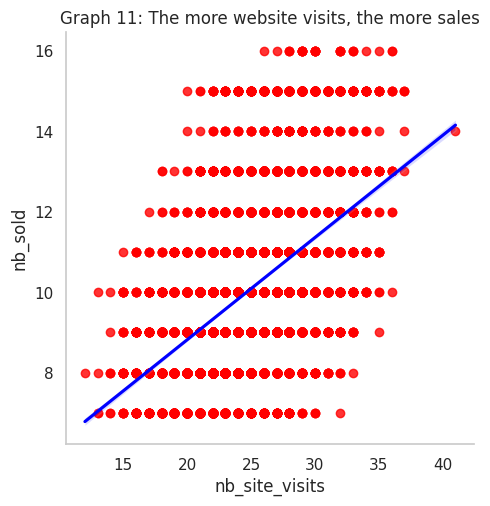

In [ ]:
# plot a scatter plot with regression line for website visits and products sold

sns.set(style="whitegrid")

# Customize colors
scatter_color = 'red'
line_color = 'blue'

# Plot
ax = sns.lmplot(data=df, x='nb_site_visits', y='nb_sold', scatter_kws={'color': scatter_color}, line_kws={'color': line_color})
plt.grid(False)

# Set the title of the plot
plt.title('Graph 11: The more website visits, the more sales')

# Save the plot as a PNG file
plt.savefig('Graph 11 The more website visits, the more sales.png')

# Show the plot
plt.show()

In [ ]:
# differences between the customers in each group

# Import necessary libraries
import pandas as pd

# Group by 'sales_method' and calculate descriptive statistics for each group
grouped_stats = df.groupby('sales_method').agg({
    'nb_sold': ['mean', 'std', 'min', 'median', 'max'],
    'revenue': ['mean', 'std', 'min', 'median', 'max'],
    'years_as_customer': ['mean', 'std', 'min', 'median', 'max'],
    'nb_site_visits': ['mean', 'std', 'min', 'median', 'max']
})

# Flatten the MultiIndex columns
grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]

# Display the grouped statistics
grouped_stats

,nb_sold_mean,nb_sold_std,nb_sold_min,nb_sold_median,nb_sold_max,revenue_mean,revenue_std,revenue_min,revenue_median,revenue_max,years_as_customer_mean,years_as_customer_std,years_as_customer_min,years_as_customer_median,years_as_customer_max,nb_site_visits_mean,nb_site_visits_std,nb_site_visits_min,nb_site_visits_median,nb_site_visits_max
sales_method,,,,,,,,,,,,,,,,,,,,
Call,9.509674,1.733856,7,10.0,14,47.673833,8.952431,25.71,49.265,86.97,5.176743,5.123549,0,4.0,47,24.423821,3.599864,12,24.0,41
Email,9.729306,1.179299,8,10.0,15,97.182298,11.144804,78.83,95.790,148.97,4.983793,5.077788,0,3.0,63,24.754353,3.281552,13,25.0,37
Email + Call,12.225505,1.931459,8,12.0,16,183.991155,27.744558,122.11,184.500,238.32,4.507387,4.760987,0,3.0,39,26.771384,3.357916,14,27.0,37
